Arbol (CART)

Wilson Valderrama

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [32]:
data = pd.read_csv("c:/datos/wine.csv")
data.head()

,Clase,Alcohol,Acido Malico,Ceniza,Alcalinidad,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Intensidad del Color,Tono,OD280/OD315,Prolina
0,Clase 1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Clase 1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Clase 1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Clase 1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,Clase 1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
data.shape

(178, 14)

In [34]:
data.describe()

,Alcohol,Acido Malico,Ceniza,Alcalinidad,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Tono,OD280/OD315,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

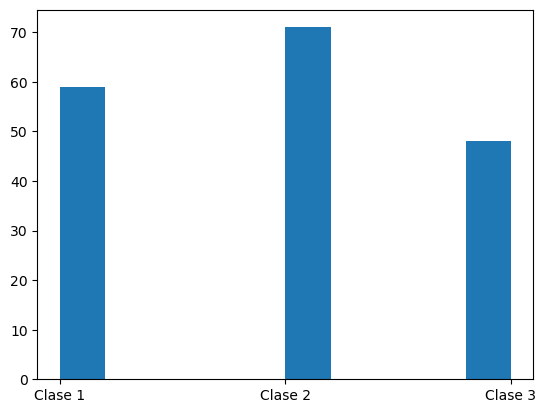

In [35]:
plt.hist(data.Clase)

In [36]:
predictors_col = ["Alcohol","Acido Malico","Ceniza","Alcalinidad","Magnesio","Fenoles Totales","Flavonoides","Fenoles No Flavonoides", "Proantocianinas","Intensidad del Color","Tono","OD280/OD315","Prolina"]
target_col = ['Clase']

In [37]:
predictors = data[predictors_col]
target = data[target_col]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [92]:
tree = DecisionTreeClassifier()

In [93]:
arbol = tree.fit(X_train, y_train)

[Text(0.375, 0.875, 'x[9] <= 3.46\ngini = 0.651\nsamples = 142\nvalue = [47, 60, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.5, 0.625, 'x[6] <= 1.58\ngini = 0.595\nsamples = 94\nvalue = [47, 12, 35]'),
 Text(0.25, 0.375, 'x[12] <= 465.0\ngini = 0.102\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(0.75, 0.375, 'x[12] <= 679.0\ngini = 0.289\nsamples = 57\nvalue = [47, 10, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]')]

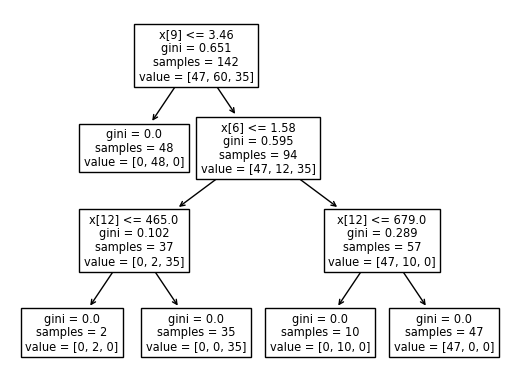

In [87]:
plot_tree(arbol)

In [88]:
predicciones = arbol.predict(X_test)

In [89]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Clase 1,Clase 2,Clase 3
Actual,,,
Clase 1,12,0,0
Clase 2,0,12,0
Clase 3,0,0,12


In [90]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0